# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([-0.11828354, -0.4965341 ,  0.50331226,  1.7807345 ,  1.48420637,
       -0.03055922, -0.80899938,  0.18318704,  2.07654626, -0.52156001,
       -0.22583706, -0.07547192, -0.95936927, -0.04614691, -0.85559662,
        0.2985425 ,  0.34529803, -1.36346707, -0.14457547, -1.15300164,
        1.63359548, -1.0138892 ,  1.53579461, -1.44478959,  0.67037331,
       -0.75974637,  1.88915863, -2.09831503, -0.87567594, -0.21795387,
       -0.94023248,  0.20970678,  2.48226396,  0.55979369,  1.99410855,
        1.87756138, -0.59747009,  0.35225426,  2.85112613, -0.20075148,
       -0.23331743, -1.41336377,  0.64824846,  0.57908851,  0.48138453,
        0.12563273,  1.71382378,  0.34009085, -2.11480167, -1.99873069,
        1.32418975, -0.25864379, -1.90257496, -0.09100792,  0.24803935,
        0.58398635,  0.29216592, -1.47394909, -2.12416849,  1.47375025,
       -0.66792692, -0.93724511,  0.52021486, -0.23608175, -0.31949548,
       -1.05951533,  0.27730124,  0.43084188,  0.9021457 ,  0.90

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [5]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

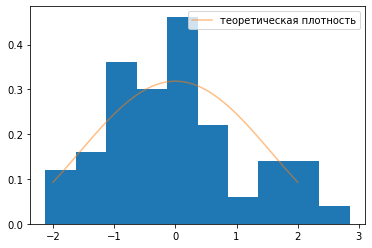

In [6]:
plt.hist(sample, density=True)
x = np.linspace(-2,2,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.01973967810471809
1.24996561290273


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [8]:
norm_rv = sts.norm(loc=cosine_rv.mean(), scale=cosine_rv.std() / np.sqrt(100))
plt.hist(means, density=True, bins=40)
x = np.linspace(0, 0,5, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

NameError: name 'means' is not defined

In [ ]:
norm_rv = sts.norm(loc=cosine_rv.mean(), scale=cosine_rv.std() / np.sqrt(100))

for N in [10, 100, 1000, 10000]:
  means = []
  for i in range(10000):
    means.append(np.mean(norm_rv.rvs(N)))
  plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

С увеличением объема выборки качество апроксимации распределения выборочного среднего повышается. При объеме выборки > 100 работает хорошо.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [9]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [10]:
total_df = df[['total day calls', 'churn' ]]
total_df

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


### Cреднее значение по total day calls:

In [11]:
means = total_df.groupby('churn')['total day calls'].mean()
means

churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64

### Дисперсия:

In [12]:
var = total_df.groupby('churn')['total day calls'].var(ddof=1)
var

churn
False    392.085817
True     465.795985
Name: total day calls, dtype: float64

### Cтандартное отклонение:

In [13]:
std = total_df.groupby('churn')['total day calls'].std()
std

churn
False    19.801157
True     21.582307
Name: total day calls, dtype: float64

### Кол-во значений:

In [14]:
count = total_df.groupby('churn')['total day calls'].count()
count

churn
False    2850
True      483
Name: total day calls, dtype: int64

### Доверительные интервалы:

In [15]:
import statsmodels.stats.weightstats as ssw
ssw._zconfint_generic(means,  std / np.sqrt(count), alpha = 0.05, alternative='two-sided')

(churn
 False    99.556188
 True     99.410662
 Name: total day calls, dtype: float64,
 churn
 False    101.010127
 True     103.260145
 Name: total day calls, dtype: float64)